6 Steps to build a Linear Regression model
Step 1: Importing the dataset
Step 2: Data pre-processing
Step 3: Splitting the test and train sets
Step 4: Fitting the linear regression model to the training set
Step 5: Predicting test results
Step 6: Visualizing the test results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../datasets/Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
wf = data.copy()

In [5]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
wf.isnull().sum().sort_values(ascending = False)

Salary             0
YearsExperience    0
dtype: int64

In [7]:
print(wf.duplicated().sum()) # to check the duplicate records
wf[wf.duplicated()]

0


,YearsExperience,Salary


In [8]:
wf.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


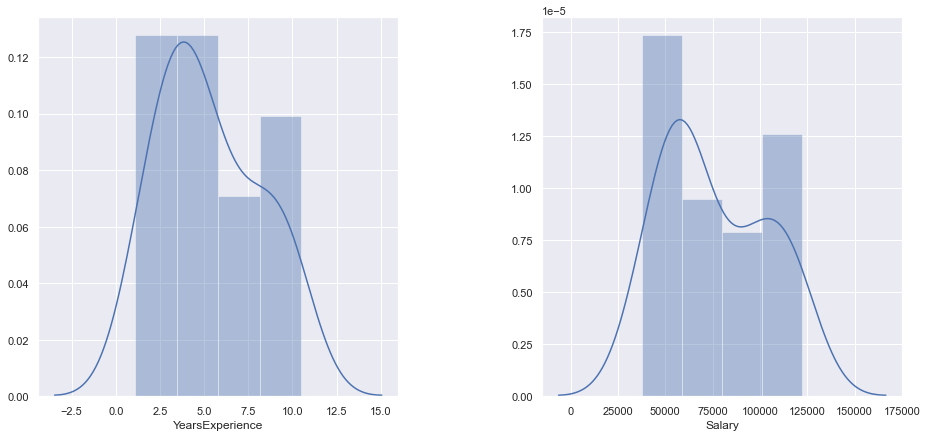

In [9]:
plt.figure(figsize = (15, 25))
sns.set(style="darkgrid")
plotnumber = 1

for column in wf:
    if plotnumber <= 15:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(wf[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

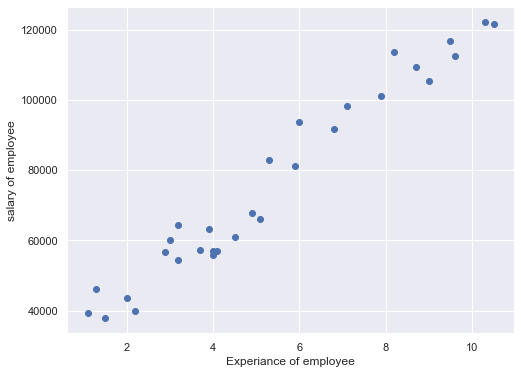

In [10]:
plt.figure(figsize=(8,6))
plt.xlabel("Experiance of employee")
plt.ylabel("salary of employee")
plt.scatter(x=wf['YearsExperience'],y=wf['Salary'])
plt.show()

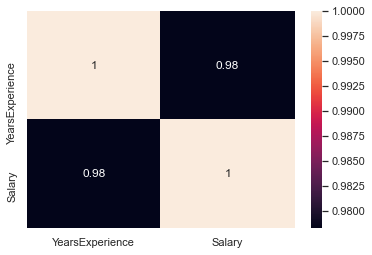

In [11]:
sns.heatmap(wf.corr(),annot = True)
plt.show()

In [12]:
X=wf[["YearsExperience"]]
Y=wf["Salary"]

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#create object of LinearRegression class
lr=LinearRegression()

In [17]:
#train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
#check slope /coefficient 
m=lr.coef_
print("slope /coefficient is : ",m)

slope /coefficient is :  [9360.26128619]


In [19]:
#check intercept 
c=lr.intercept_
print("Intercept : ",c)

Intercept :  26777.391341197632


In [20]:
#Test the model , use inbuilt method predict()
#Y_pred = m*X_test + C

Y_pred=lr.predict(X_test)

In [21]:
#R2 Score 

print("R2 Score : ",r2_score(Y_test,Y_pred))

R2 Score :  0.9740993407213511


In [22]:
lr.score(X_train,Y_train)

0.9423777652193379

In [23]:
lr.score(X_test,Y_test)

0.9740993407213511

In [24]:
print("MSE: ",mean_squared_error(Y_test,Y_pred))

MSE:  23370078.800832972


In [25]:
lr.predict([[6]])

array([82938.95905836])

In [26]:
#y=mx+c
9202.23359825*5.3+26049.577715443353

74821.41578616836

In [27]:
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
df1=pd.DataFrame(dict)
df1['Residual']=df1['Actual Output']-df1['Predicted output']
df1

,Actual Output,Predicted output,Residual
2,37731.0,40817.783270,-3086.783270
28,122391.0,123188.082589,-797.082589
13,57081.0,65154.462615,-8073.462615
10,63218.0,63282.410357,-64.410357
26,116969.0,115699.873560,1269.126440
24,109431.0,108211.664531,1219.335469
27,112635.0,116635.899689,-4000.899689
11,55794.0,64218.436486,-8424.436486
17,83088.0,76386.776158,6701.223842


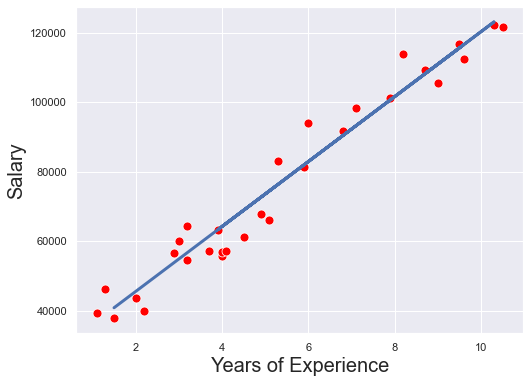

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=wf,x="YearsExperience",y="Salary",palette="deep",s=80,color='red')
plt.plot(X_test["YearsExperience"],Y_pred,linewidth=3.0)
plt.xlabel("Years of Experience",size="20")
plt.ylabel("Salary",size="20")
plt.show()

In [29]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr) 
  
# Load the pickled model 
saved_model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
saved_model.predict(X_test)

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [32]:
import joblib
filename = 'linear.sav'
joblib.dump(lr, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.9740993407213511


In [46]:
exp = float(input())


output= saved_model.predict([[exp]])
print("Salary for given exp:", output)

6
Salary for given exp: [82938.95905836]


In [48]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(lr,open('linearregression.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [49]:
# Load the pickled model 
import pickle
model = pickle.load(open('linearregression.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])